## [Enhancing visualizations in R](https://www.coursera.org/learn/data-analysis-r/lecture/A7ESc/enhancing-visualizations-in-r)

```
library(ggplot2)
library(palmerpenguins)

ggplot(data=penguins)+
  geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species))
```

In Python, we can use seaborn to plot the same, using `hue` instead of `color` to plot each species in different hue.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv"

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

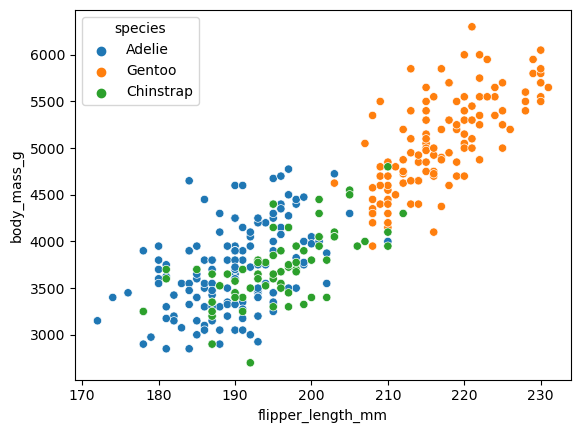

In [13]:
df = pd.read_csv(url)

sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df)


<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

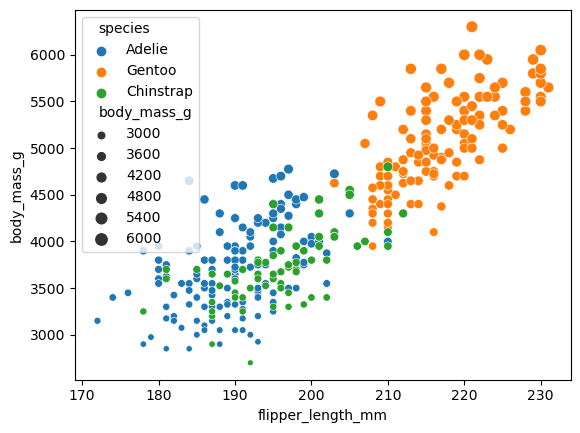

In [7]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', size='body_mass_g', data=df)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

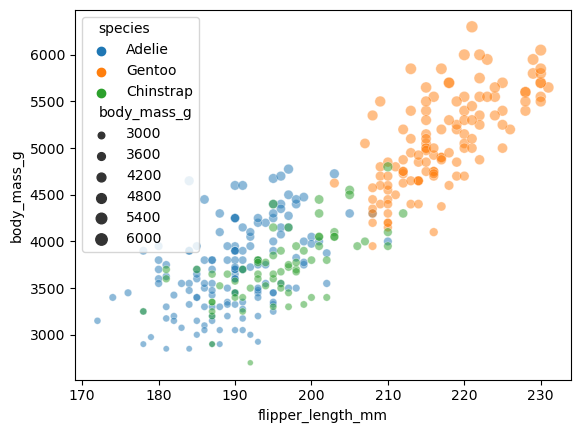

In [11]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', size='body_mass_g', alpha=0.5, data=df)

[More with ggplot2](https://www.coursera.org/learn/data-analysis-r/lecture/qoIua/doing-more-with-ggplot)

We can even use two geoms in the same plot. Let's say we want to show the relationship between the trend line and the data points more clearly. We can combine the code for geom underscore point and the code for geom underscore smooth by adding a plus symbol after geom underscore smooth.

```
library(ggplot2)
library(palmerpenguins)

ggplot(data=penguins)+
  geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
  geom_smooth(mapping=aes(x=flipper_length_mm, y=body_mass_g, linetype=species))
```

(Note that when plotting both scatterplot and lineplot together it becomes way to busy!)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

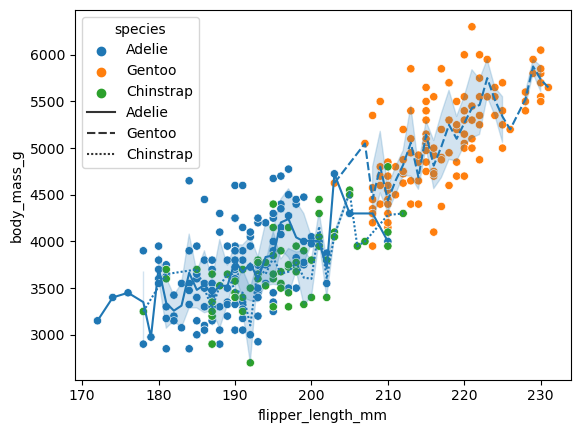

In [16]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df)
sns.lineplot(x='flipper_length_mm', y='body_mass_g', style='species', data=df)


<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

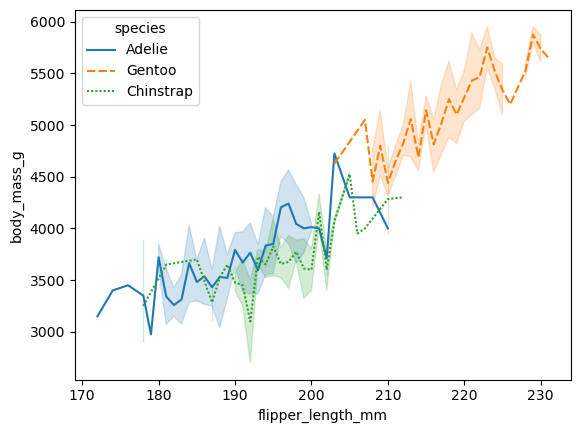

In [19]:
# Plot a line graph with differnt line type / styles

sns.lineplot(x='flipper_length_mm', y='body_mass_g', style='species', hue='species', data=df)

The `geom_jitter` function creates a scatter plot and then adds a small amount of
random noise to each point in the plot.

Jittering helps us deal with over-plotting, which happens when the data points in a plot overlap with each other. Jittering makes the points easier to find. 

In Python seaborn, we can use the `stripplot` plus the jitter attribute.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

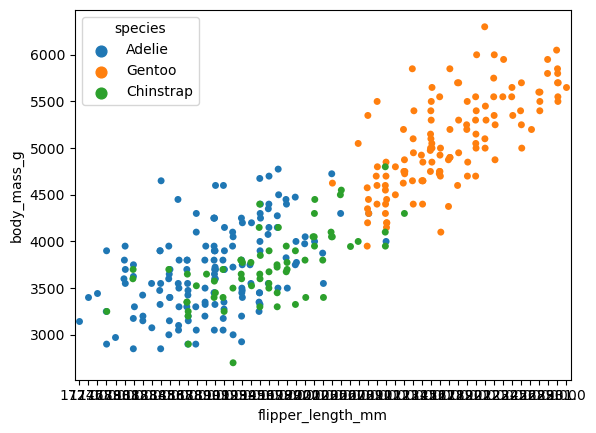

In [23]:
sns.stripplot(x='flipper_length_mm', y='body_mass_g', hue='species', jitter=True, data=df)

## Exploring Bar Charts

The diamonds dataset come preinstalled with ggplot2.
```
ggplot(data=diamonds) +
  geom_bar(mapping=aes(x=cut, color=cut))
```

In ggplot2 geom_bar charts, the y-axis defaults to "how many times the X value appear in the data". Seaborn doesn't do that. We have to manually calculate the count using the `value_counts` method. OR! Use `countplot(x='cut', data=diamonds, dodge=False)`.

In [25]:
diamonds_url='https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv'

diamonds = pd.read_csv(diamonds_url)

In [35]:
# Calculate the count for each cut
cut_counts = diamonds['cut'].value_counts()
cut_counts

# diamonds['cut'].value_counts() calculates the count for each value of the cut column in the diamonds data frame.
# The resulting series is then passed to sns.barplot as the x and y arguments. 


Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<AxesSubplot:>

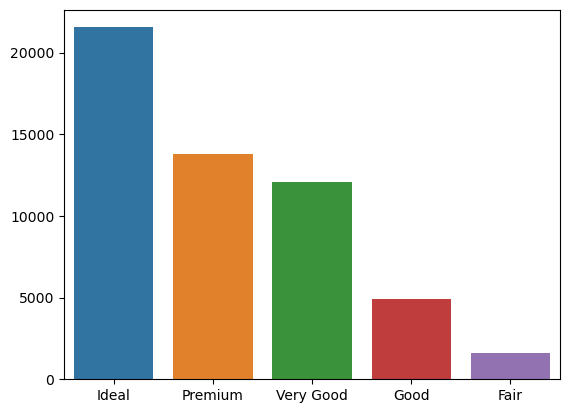

In [32]:
# Plot the bar chart
sns.barplot(x=cut_counts.index, y=cut_counts.values)

<AxesSubplot:xlabel='cut', ylabel='count'>

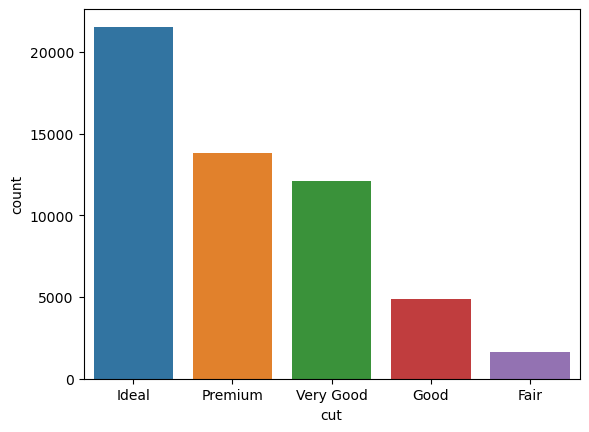

In [63]:
sns.countplot(x='cut', data=diamonds, order=['Ideal','Premium','Very Good','Good','Fair'], dodge=False)

In ggplot2 you can create a stacked bar chart like this:
```
ggplot(data=diamonds) +
  geom_bar(mapping=aes(x=cut, fill=clarity))
```

To create a stacked bar chart in seaborn similar to the one in ggplot2, you can use the `seaborn.countplot` function. The `countplot` function creates a bar chart showing the count of observations in each category. To create a stacked bar chart, you need to specify the `hue` argument, which defines the variable to use for the fill.

HOWEVER! Notice that in `geom_bar`, the stacked bar chart remains the same - the bars are separated into different colors of `clarity`. BUT! In `seaborn countplot`, the bars are much shorter - because they all start at 0.

<AxesSubplot:xlabel='cut', ylabel='count'>

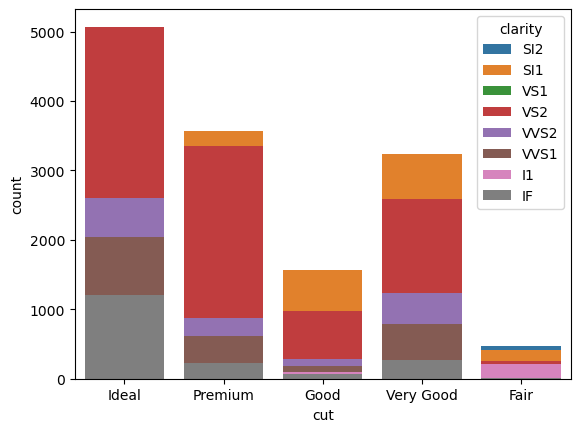

In [40]:
sns.countplot(x='cut', hue='clarity', data=diamonds, dodge=False)


In [47]:
# Calculate the total number of rows for each cut and clarity combination
cut_clarity_totals = diamonds.groupby(['cut', 'clarity']).size().reset_index(name='counts')
cut_clarity_totals


,cut,clarity,counts
0,Fair,I1,210
1,Fair,IF,9
2,Fair,SI1,408
3,Fair,SI2,466
4,Fair,VS1,170
5,Fair,VS2,261
6,Fair,VVS1,17
7,Fair,VVS2,69
8,Good,I1,96
9,Good,IF,71


<AxesSubplot:xlabel='cut', ylabel='counts'>

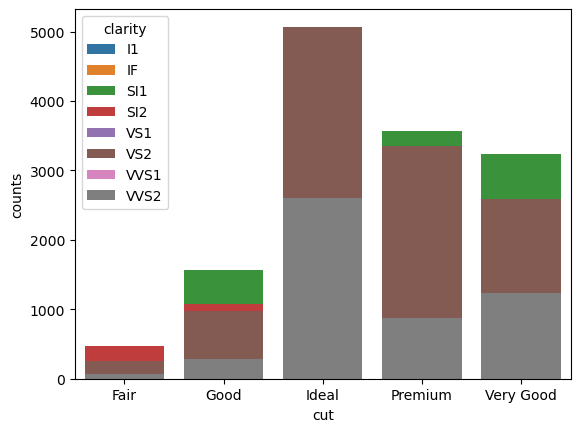

In [64]:
# Plot the bar chart
sns.barplot(x='cut', y='counts', hue='clarity', data=cut_clarity_totals, dodge=False)

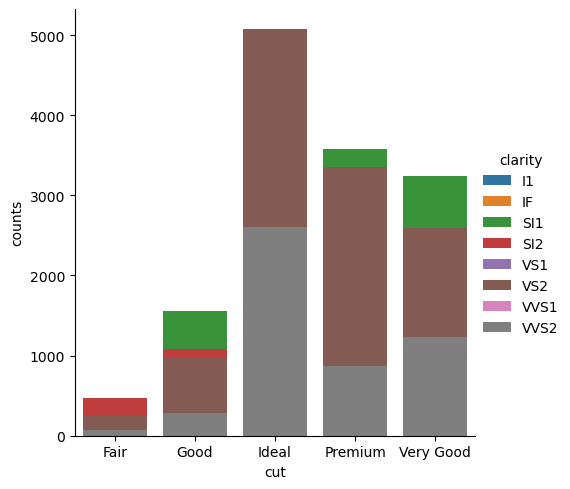

In [69]:
# I've tried many different methods but still can't figure out how to stack `clarity` up 
# on top of each other to show the cumulative count of diamonds for each cut.

sns.catplot(x='cut', y='counts', hue='clarity', kind='bar', data=cut_clarity_totals, dodge=False, ci=None)